In [2]:
!unzip ../input/quora-question-pairs/train.csv.zip

Archive:  ../input/quora-question-pairs/train.csv.zip
  inflating: train.csv               


In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download('omw-1.4')
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning and EDA

In [4]:
data = pd.read_csv("train.csv")
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


## Remove Null Values

In [5]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
data.dropna(inplace=True)

## Text Cleaning

In [7]:
def text_cleaning(x):
    
    questions = re.sub('\s+\n+', ' ', x)
    questions = re.sub('[^a-zA-Z0-9]', ' ', questions)
    questions = questions.lower()
    
    return questions

In [8]:
data['question1_cleaned'] = data['question1'].progress_apply(text_cleaning)
data['question2_cleaned'] = data['question2'].progress_apply(text_cleaning)
data

100%|██████████| 404287/404287 [00:02<00:00, 138711.01it/s]


,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,do you believe there is life after death,is it true that there is life after death
404287,404287,537928,537929,What is one coin?,What's this coin?,0,what is one coin,what s this coin
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,what is the approx annual cost of living while...,i am having little hairfall problem but i want...


## Sentence Length Distributions

In [9]:
data['question1_lens'] = data['question1_cleaned'].apply(lambda x: len(x.split()))
data['question2_lens'] = data['question2_cleaned'].apply(lambda x: len(x.split()))

## Word Cloud Visualization

In [10]:
question1 = data['question1_cleaned'].tolist()
question2 = data['question2_cleaned'].tolist()

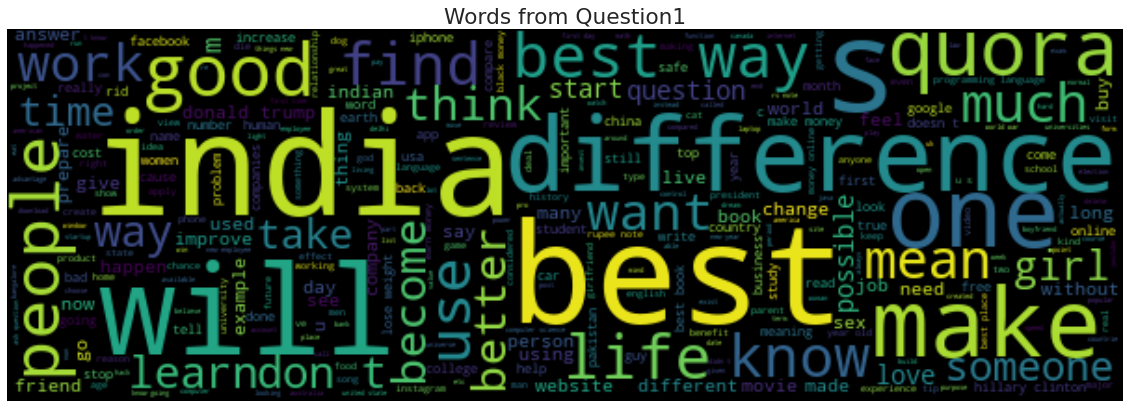

In [11]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(question1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Words from Question1")
plt.axis("off")
plt.show()

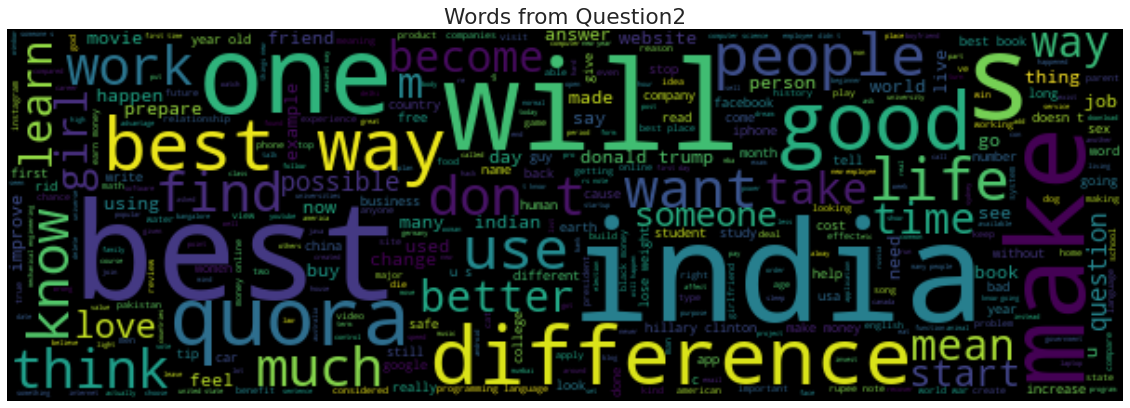

In [12]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(question2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Words from Question2")
plt.axis("off")
plt.show()

## Ideal Sentence Length

In [13]:
data['question1_lens'].describe()

count    404287.000000
mean         11.127968
std           5.571416
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         128.000000
Name: question1_lens, dtype: float64

In [14]:
data['question2_lens'].describe()

count    404287.000000
mean         11.376792
std           6.480827
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         248.000000
Name: question2_lens, dtype: float64

In [15]:
q1 = data['question1_lens'].quantile(0.25)
q3 = data['question1_lens'].quantile(0.75)

upper_outlier = q3 + 1.5*(q3-q1)
print(upper_outlier)

22.0


**Inference:** Upper outlier is 22, lets take 50 to be the ideal length so that some of the extremely long sentences can also be represented well enough for our model

# Modelling


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer,DataCollatorWithPadding,TFAutoModel,DistilBertConfig,TFDistilBertModel, BertConfig, TFBertModel, TFRobertaModel
from datasets import load_dataset

## Siamese BERT
- For the backbone of our siamese neural network we will use a pretrained BERT model

In [17]:
model_checkpoint = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

## BERT Text Tokenizer
- Generates
    - Padded Encodings
    - Attention Masks

In [18]:
def encode_text(text, tokenizer):
    
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=50,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )

    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

## Data Splitting
- 80:20 split is performed on the data
    - 80% for Training
    - 20% for Validation

In [19]:
data = data.sample(250000)
train = data.iloc[:int(250000*0.80),:]
val = data.iloc[int(250000*0.80):,:]

print(train.shape)
print(data.shape)
print(val.shape)

(200000, 10)
(250000, 10)
(50000, 10)


In [20]:
# data = data.sample(400000)
# train = data.iloc[:int(400000*0.80),:]
# val = data.iloc[int(400000*0.80):,:]

X1_train = encode_text(train['question1_cleaned'].tolist(), tokenizer)
X2_train = encode_text(train['question2_cleaned'].tolist(), tokenizer)
X1_val = encode_text(val['question1_cleaned'].tolist(), tokenizer)
X2_val = encode_text(val['question2_cleaned'].tolist(), tokenizer)

y_train = train['is_duplicate'].values
y_val = val['is_duplicate'].values

## TPU Configuration

In [21]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")     

Running on 1 replicas
Batch Size: 32


# Original Siamese Network with L1 Distance Layer

In [22]:
class L1Dist(Layer):
    
    def __init__(self,**kwargs):
        super().__init__()
        
    def call(self,embedding1,embedding2):
        return tf.math.abs(embedding1 - embedding2)

In [23]:
with strategy.scope():
    transformer_model = TFBertModel.from_pretrained(model_checkpoint)

    input_ids_in1 = Input(shape=(None,),name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,),name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')

    embedding_layer1 = transformer_model(input_ids_in1, attention_mask=input_masks_in1).last_hidden_state
    embedding_layer2 = transformer_model(input_ids_in2, attention_mask=input_masks_in2).last_hidden_state

    embedding1 = GlobalAveragePooling1D()(embedding_layer1)
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)
    l1_dist = L1Dist()(embedding1,embedding2)

    x = Dense(512, activation='relu')(l1_dist)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs = output)
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),metrics='accuracy')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [24]:
for layer in model.layers[:5]:
    layer.trainable = False

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids1 (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
attention_mask1 (InputLayer)    [(None, None)]       0                                            
__________________________________________________________________________________________________
input_ids2 (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
attention_mask2 (InputLayer)    [(None, None)]       0                                            
______________________________________________________________________________________________

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [27]:
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.00000001)

In [28]:
history = model.fit((np.asarray(X1_train['input_ids']),np.asarray(X1_train['attention_masks']),np.asarray(X2_train['input_ids']),np.asarray(X2_train['attention_masks'])), 
                    y_train, batch_size=BATCH_SIZE, epochs=3,  
                    validation_data=((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])), y_val),
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/3
6250/6250 [==============================] - 4592s 732ms/step - loss: 0.4618 - accuracy: 0.7539 - val_loss: 0.3704 - val_accuracy: 0.8368
Epoch 2/3
6250/6250 [==============================] - 4591s 735ms/step - loss: 0.3337 - accuracy: 0.8493 - val_loss: 0.3283 - val_accuracy: 0.8564
Epoch 3/3
6250/6250 [==============================] - 4589s 734ms/step - loss: 0.2552 - accuracy: 0.8919 - val_loss: 0.3190 - val_accuracy: 0.8675


## Model Inference

## Learning Curve

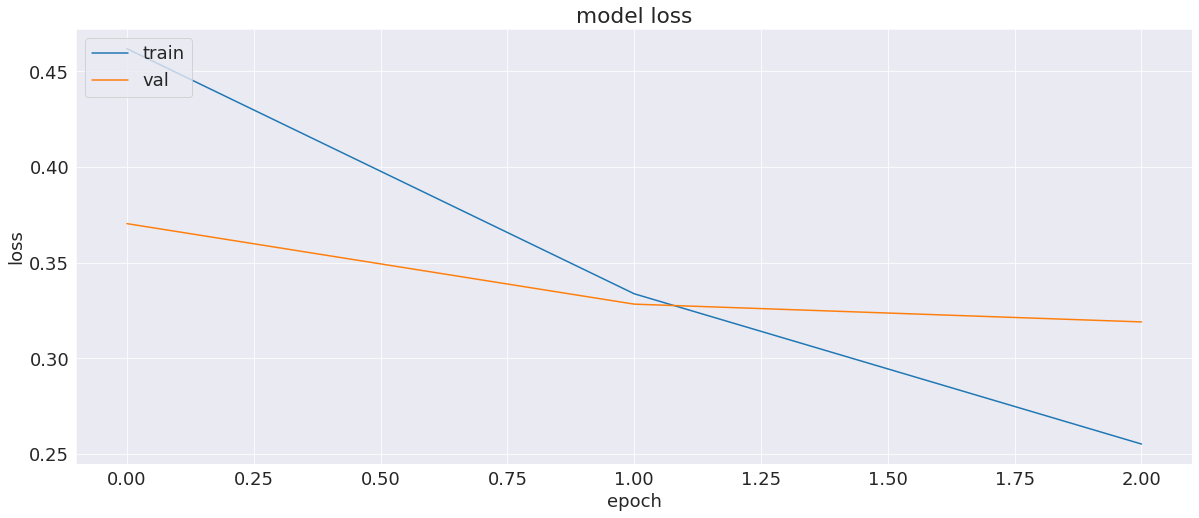

In [29]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

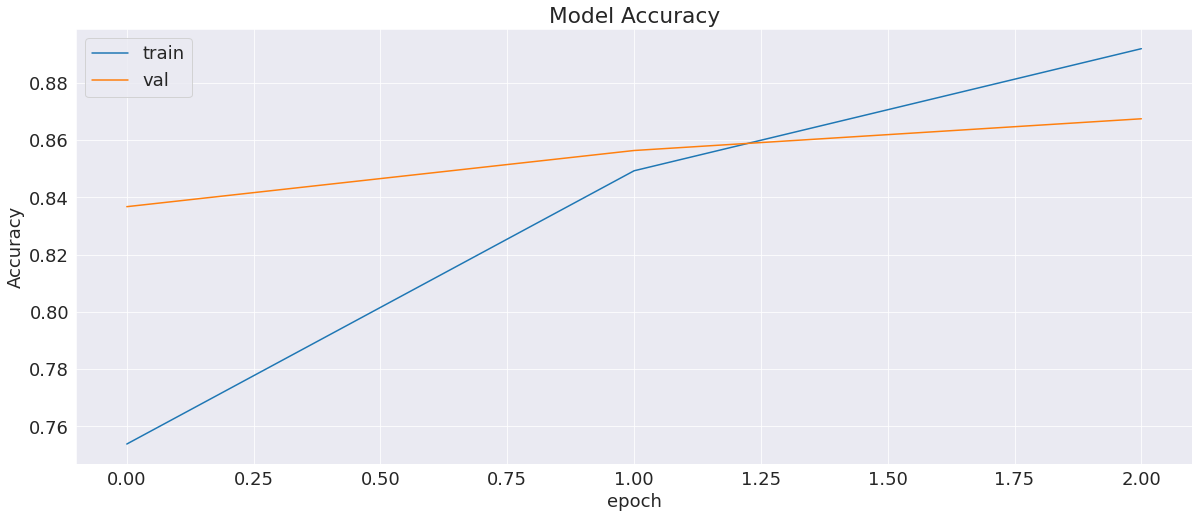

In [30]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
y_pred = model.predict((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])))

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

## ROC-AUC Curve

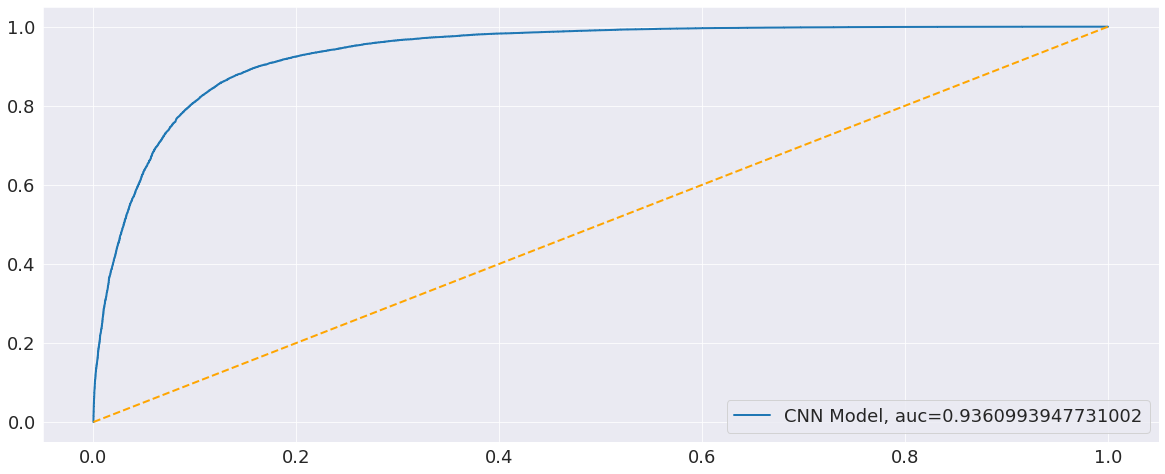

In [33]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_val,  y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

## Confusion Matrix

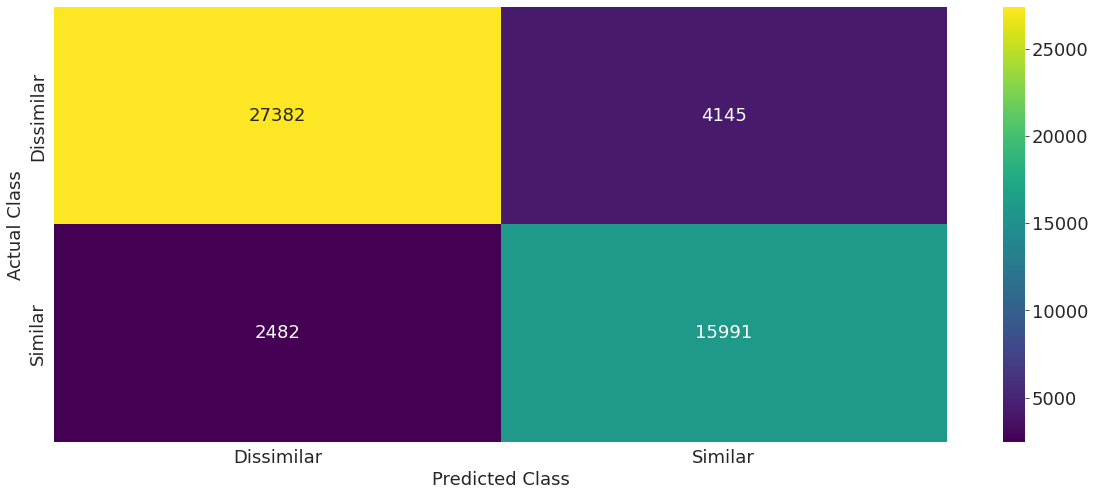

In [34]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

sns.heatmap(confusion_matrix(y_val, y_pred),cmap='viridis',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Classification Report

In [35]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     31527
           1       0.79      0.87      0.83     18473

    accuracy                           0.87     50000
   macro avg       0.86      0.87      0.86     50000
weighted avg       0.87      0.87      0.87     50000



In [39]:
# X1_val = encode_text(["what is one coin"], tokenizer)
# X2_val = encode_text(["what's this coin"], tokenizer)

X1_val = encode_text(["Why do rockets look white?"], tokenizer)
X2_val = encode_text(["Why are rockets and boosters painted white?"], tokenizer)
	

# Predict
y_pred = model.predict((
    X1_val['input_ids'],
    X1_val['attention_masks'],
    X2_val['input_ids'],
    X2_val['attention_masks']
))
print("Prediction:", y_pred)

Prediction: [[0.79314625]]
